In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

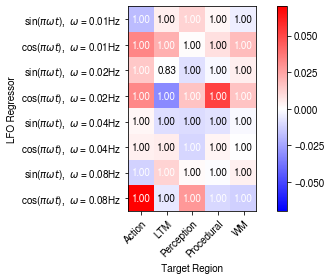

In [87]:
task = "Rest1"
regions = ["Action", "LTM", "Perception", "Procedural", "WM"] 
lfos = [r"""%s($\pi \omega t$),  $\omega$ = %.2fHz""" % (y, x) for x in [0.01, 0.02, 0.04, 0.08] for y in ["sin", "cos"]]
    
C = np.loadtxt("%s_avg_C.csv" % (task,), delimiter=",").T
pC = np.loadtxt("%s_avg_pC.csv" % (task,), delimiter=",").T

vmax = np.max(np.abs(C))

fig, ax = plt.subplots(1, 1)

im = ax.imshow(C, cmap="bwr", vmin = -vmax, vmax = vmax)

#cbar = fig.colorbar(ax)
cbar = ax.figure.colorbar(im, ax=ax, orientation="vertical", ticks=[-0.05, -0.025, 0, 0.025,0.05])
for l in cbar.ax.yaxis.get_ticklabels():
    l.set_family("FreeSans")

plt.setp(ax.get_xticklabels(), rotation=45,
             ha="right", rotation_mode="anchor")
plt.setp(ax.get_yticklabels(),
        ha='right')


ax.set_ylabel("LFO Regressor", fontname="FreeSans")
ax.set_xlabel("Target Region", fontname="FreeSans")

ax.set_xticks(np.arange(len(regions)))
ax.set_yticks(np.arange(len(lfos)))
    
ax.set_xticklabels(regions, fontname="FreeSans")
ax.set_yticklabels(lfos, fontname="FreeSans")

rows, cols = C.shape
for i in range(rows):
    for j in range(cols):
        if abs(C[i,j]) < 0.01:
            color = "k"
        else:
            color = "w"
        text = ax.text(j, i, "%.2f" % pC[i, j], fontname = 'FreeSans',
                           ha="center", va="center", color=color)


fig.tight_layout()
plt.savefig("resting_state_regressors.png", dpi=200)
plt.show()
